Importing important libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')

Data inspection

In [133]:
calories = pd.read_csv('Dataset/calories.csv')
exercise = pd.read_csv('Dataset/exercise.csv')

In [134]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [135]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Merge both dataframes on 'User_ID' column

In [136]:
workout = pd.merge(exercise, calories, on ='User_ID')
workout.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [137]:
workout.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [138]:
workout.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [139]:
workout.shape

(15000, 9)

Checking null values

In [140]:
workout.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [141]:
workout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


Removing Unwanted columns

In [142]:
workout.drop(['User_ID'],axis = 1, inplace= True)

In [143]:
workout.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [144]:
workout.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Gender distribution

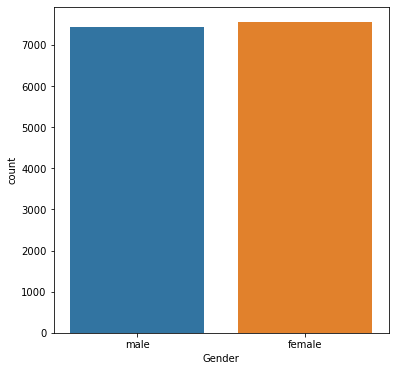

In [145]:
plt.figure(figsize=(6,6))
sns.countplot(workout['Gender'])
plt.show()

Age distribution

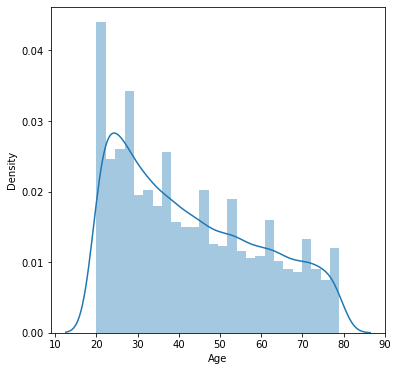

In [146]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Age'])
plt.show()

Height distribution

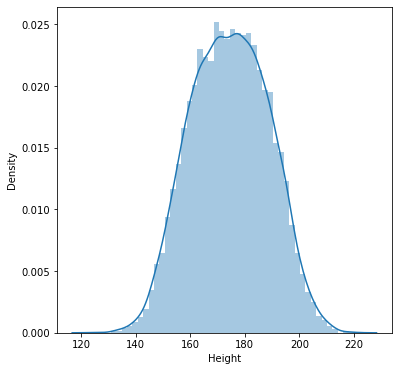

In [147]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Height'])
plt.show()

Weight distribution

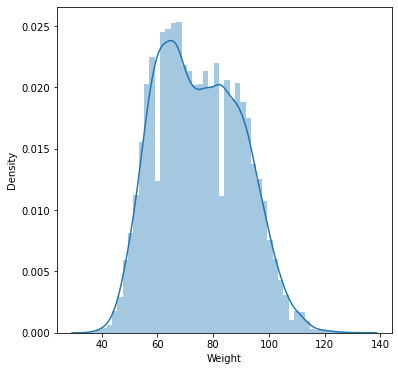

In [148]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Weight'])
plt.show()

Duration distribution

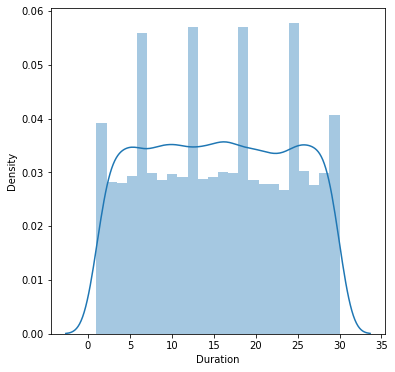

In [149]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Duration'])
plt.show()

Heart_Rate distribution

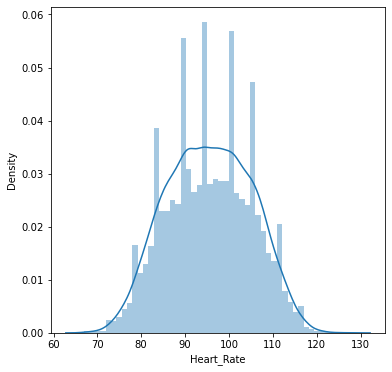

In [150]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Heart_Rate'])
plt.show()

Body_Temp distribution

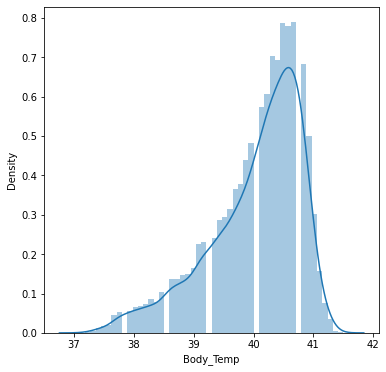

In [151]:
plt.figure(figsize=(6,6))
sns.distplot(workout['Body_Temp'])
plt.show()

Visualising all numeric variable

<Figure size 432x864 with 0 Axes>

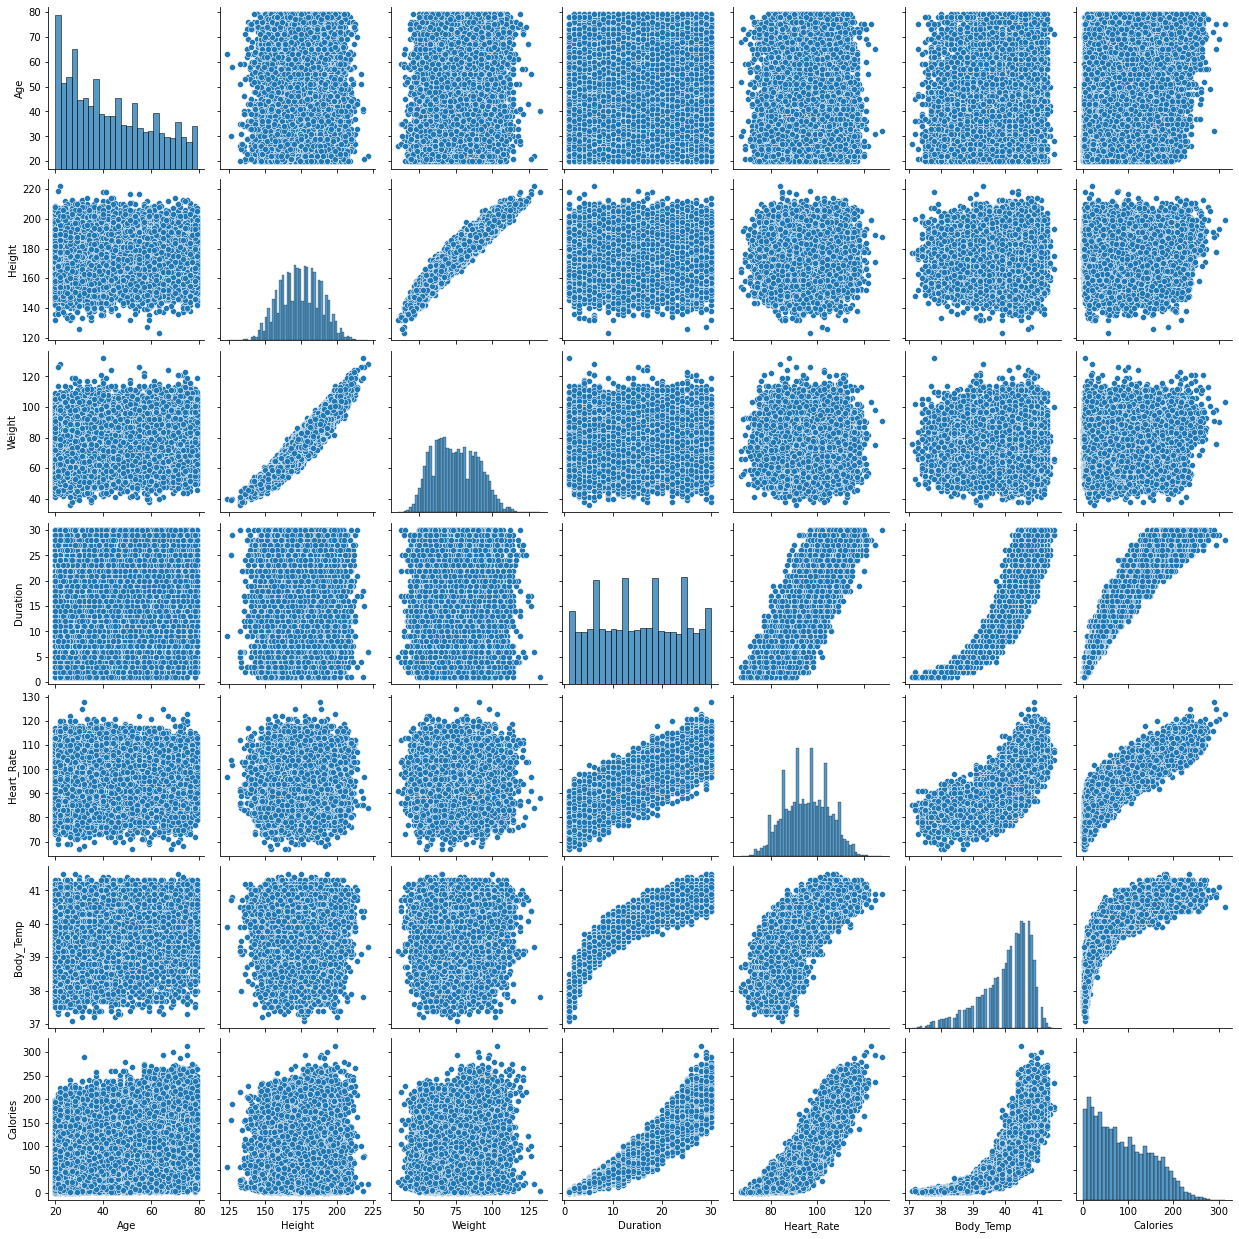

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,12))
sns.pairplot(workout)
plt.show()

Encode Categorical Data

In [153]:
from sklearn.preprocessing import LabelEncoder
for col in workout.columns:
    if workout[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(workout[col].values))
        workout[col]=lbl.transform(workout[col].values)

In [154]:
workout.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Spliting data by train_test_split

In [155]:
x=workout.drop('Calories',axis=1)
y=workout['Calories']

Scaling Data

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Model Training and Testing

In [158]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [159]:
lr=LinearRegression()

knn = KNeighborsRegressor(n_neighbors=10)

dt = DecisionTreeRegressor(max_depth = 3)

rf = RandomForestRegressor(max_depth = 3, n_estimators=500)

ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

xgbr = XGBRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

Testing with linear regression

In [191]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r1 = r2_score(y_test,y_pred)
r1

0.969214323020104

Testing with KNeighborsRegressor

In [195]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
r2 = r2_score(y_test,y_pred)
r2

0.9938499100677041

Testing with DecisionTreeRegressor

In [208]:
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score
r3 = r2_score(y_test,y_pred)
r3

0.9246567636111759

Testing with RandomForestRegressor

In [163]:
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)
from sklearn.metrics import r2_score
r4 = r2_score(y_test,y_pred)
r4

0.9365382022467176

Testing with AdaBoostRegressor

In [232]:
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
from sklearn.metrics import r2_score
r5 = r2_score(y_test,y_pred)
r5

0.9352696224718923

Testing with GradientBoostingRegressor

In [178]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)
from sklearn.metrics import r2_score
r6 = r2_score(y_test,y_pred)
r6

0.9946016922464055

Testing with XGBoostRegressor

In [227]:
xgbr = XGBRegressor() #max_depth=2, n_estimators=100, learning_rate =.2

xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)
from sklearn.metrics import r2_score
r7 = r2_score(y_test,y_pred)
r7

0.998801754464812

Model Results

In [167]:
metric_results= {'Model': ['linear Regression', 'KNeighbors', 'Decision Tree','RandomForest','AdaBoost','GradientBoosting','Xgboost'], 
                 'R Square': [r1, r2, r3,r4,r5,r6,r7]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R Square
0,linear Regression,0.969214
1,KNeighbors,0.993850
2,Decision Tree,0.924657
3,RandomForest,0.936538
4,AdaBoost,0.936339
5,GradientBoosting,0.994604
6,Xgboost,0.994912


Ploting result

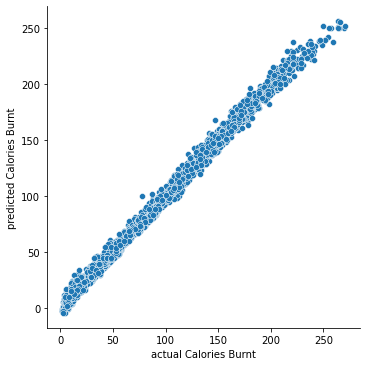

In [168]:
prediction= pd.DataFrame({'actual Calories Burnt': y_test, 'predicted Calories Burnt': y_pred})
sns.relplot(data=prediction, x='actual Calories Burnt', y='predicted Calories Burnt')

In [288]:
import pickle

pickle.dump(knn, open("calories.pkl", "wb"))  # here wb means write binary

model = pickle.load(open("calories.pkl", "rb"))  # here wb means read binary

In [289]:
value = (model.predict(np.array([[1, 68, 190.0, 94.0, 29.0, 105.0, 40.8]])))
round(value[0],2)

249.2

In [290]:
value = (model.predict(np.array([[0, 20, 166.0, 60.0, 14.0, 94.0, 40.3]])))
round(value[0],2)

242.5

In [ ]:
Gender	Age	Height	Weight	Duration	Heart_Rate	Body_Temp	Calories
1	68	190.0	94.0	29.0	105.0	40.8	231.0
0	20	166.0	60.0	14.0	94.0	40.3	66.0

In [ ]:
lr knn dt rf ada gbr xgbr